Log signature to path can be considered a learning in distribution instead of path
Invent some growing algorithm for that grow in a distribution point of view 


In term of the compare of two distribution, can we use the MDD but have to be normalized
Also the confidence depends on the normalization which need further research 

Use heavy tail distribution for latent variable





In [14]:
import datetime
import numpy as np
import pandas_datareader as pdr
import esig
from tqdm.auto import tqdm
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

from utils import tosig
from utils.leadlag import leadlag
from rough_bergomi import rough_bergomi

from importlib import reload
import cvae_keras
reload(cvae_keras)

import matplotlib.pyplot as plt

## Data processing

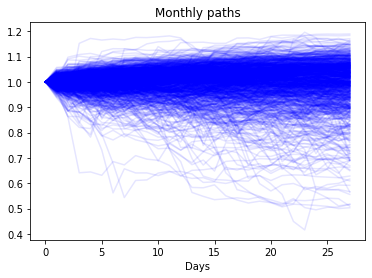

In [15]:
# # S&P 500
# data = pdr.get_data_yahoo("^GSPC", datetime.date(2000, 1, 1), datetime.date(2019, 1, 1))["Close"]

# rough_bergomi
params = {
            "M": 1000,
            "H": 0.14,
            "rho": -0.85,
            "xi0": 0.1,
            "nu": 1.5,
            "S0": 1.
          }

def _load_rough_bergomi(params):
    grid_points_dict = {"M": 28, "W": 5, "Y": 252}
    grid_points = grid_points_dict['M']
    params["T"] = grid_points / grid_points_dict["Y"]
    paths = rough_bergomi(grid_points, **params)
    windows = [leadlag(path) for path in paths]
    return windows

windows = _load_rough_bergomi(params)

for path in windows:
    returns = path[::2, 1] / path[0, 1]
    plt.plot(returns, "b", alpha=0.1)

plt.title("Monthly paths")
plt.xlabel("Days")
plt.show()

## Log-signature computing

In [16]:
order = 4
def _logsig(path):
    return esig.tosig.stream2logsig(path, order)
def _sig(path):
    return esig.tosig.stream2sig(path, order)
orig_logsig = np.array([_logsig(path) for path in tqdm(windows, desc="Computing log-signatures")])
orig_sig = np.array([_sig(path) for path in tqdm(windows, desc="Computing signatures")])
scaler = MinMaxScaler(feature_range=(0.00001, 0.99999))
logsig = scaler.fit_transform(orig_logsig)
logsigs = logsig[1:]   # 1 week forecasting 1 week 
conditions = logsig[:-1] 

In [4]:
orig_sig2 = orig_sig

In [5]:
import evaluation
reload(evaluation)
res = evaluation.test(orig_sig, orig_sig2, order=order, compute_sigs=False,
                                 confidence_level=0.99)
print("Are the generated and real distributions DIFFERENT? {}".format(res))


c: 0.01268090586890476
TU: 0.0
Are the generated and real distributions DIFFERENT? False


## CAVE

In [17]:
generator = cvae_keras.CVAE(n_latent=8, n_hidden = 50, alpha=0.003)
generator.build(logsigs.shape[-1], conditions.shape[-1])
generator.train(logsigs, conditions, n_epochs=10000)

Train on 999 samples
Epoch 1/10000
999/999 [==============================] - 0s 493us/sample - loss: 1.5963
Epoch 2/10000
999/999 [==============================] - 0s 11us/sample - loss: 1.5356
Epoch 3/10000
999/999 [==============================] - 0s 5us/sample - loss: 1.4797
Epoch 4/10000
999/999 [==============================] - 0s 8us/sample - loss: 1.4358
Epoch 5/10000
999/999 [==============================] - 0s 5us/sample - loss: 1.3649
Epoch 6/10000
999/999 [==============================] - 0s 7us/sample - loss: 1.3291
Epoch 7/10000
999/999 [==============================] - 0s 5us/sample - loss: 1.2729
Epoch 8/10000
999/999 [==============================] - 0s 5us/sample - loss: 1.2242
Epoch 9/10000
999/999 [==============================] - 0s 6us/sample - loss: 1.1740
Epoch 10/10000
999/999 [==============================] - 0s 5us/sample - loss: 1.1489
Epoch 11/10000
999/999 [==============================] - 0s 8us/sample - loss: 1.1132
Epoch 12/10000
999/999 [====

Epoch 95/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0968
Epoch 96/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0943
Epoch 97/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0953
Epoch 98/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0943
Epoch 99/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0959
Epoch 100/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0971
Epoch 101/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0966
Epoch 102/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0937
Epoch 103/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0961
Epoch 104/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0952
Epoch 105/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0941
Epoch 106/10000
999/999 [============

999/999 [==============================] - 0s 5us/sample - loss: 0.0863
Epoch 189/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0854
Epoch 190/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0836
Epoch 191/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0848
Epoch 192/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0828
Epoch 193/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0822
Epoch 194/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0848
Epoch 195/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0823
Epoch 196/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0851
Epoch 197/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0826
Epoch 198/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0806
Epoch 199/10000
999/999 [=======================

Epoch 282/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0718
Epoch 283/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0709
Epoch 284/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0697
Epoch 285/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0717
Epoch 286/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0696
Epoch 287/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0671
Epoch 288/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0699
Epoch 289/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0679
Epoch 290/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0692
Epoch 291/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0685
Epoch 292/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0672
Epoch 293/10000
999/999 [=======

Epoch 376/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0502
Epoch 377/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0498
Epoch 378/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0486
Epoch 379/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0502
Epoch 380/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0489
Epoch 381/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0489
Epoch 382/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0491
Epoch 383/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0496
Epoch 384/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0488
Epoch 385/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0463
Epoch 386/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0475
Epoch 387/10000
999/999 [=======

Epoch 470/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0382
Epoch 471/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0389
Epoch 472/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0384
Epoch 473/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0374
Epoch 474/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0371
Epoch 475/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0385
Epoch 476/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0377
Epoch 477/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0372
Epoch 478/10000
999/999 [==============================] - 0s 9us/sample - loss: 0.0393
Epoch 479/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0372
Epoch 480/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0375
Epoch 481/10000
999/999 [=======

999/999 [==============================] - 0s 5us/sample - loss: 0.0327
Epoch 564/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0333
Epoch 565/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0321
Epoch 566/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0315
Epoch 567/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0318
Epoch 568/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0322
Epoch 569/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0323
Epoch 570/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0315
Epoch 571/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0318
Epoch 572/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0323
Epoch 573/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0322
Epoch 574/10000
999/999 [=======================

Epoch 657/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0290
Epoch 658/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0288
Epoch 659/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0290
Epoch 660/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0293
Epoch 661/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0279
Epoch 662/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0267
Epoch 663/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0285
Epoch 664/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0292
Epoch 665/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0276
Epoch 666/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0284
Epoch 667/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0272
Epoch 668/10000
999/999 [=======

Epoch 751/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0262
Epoch 752/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0256
Epoch 753/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0260
Epoch 754/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0263
Epoch 755/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0258
Epoch 756/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0264
Epoch 757/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0259
Epoch 758/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0252
Epoch 759/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0256
Epoch 760/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0254
Epoch 761/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0255
Epoch 762/10000
999/999 [=======

999/999 [==============================] - 0s 5us/sample - loss: 0.0246
Epoch 845/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0242
Epoch 846/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0238
Epoch 847/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0240
Epoch 848/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0243
Epoch 849/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0239
Epoch 850/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0242
Epoch 851/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0247
Epoch 852/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0239
Epoch 853/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0242
Epoch 854/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0243
Epoch 855/10000
999/999 [=======================

Epoch 938/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0229
Epoch 939/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0225
Epoch 940/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0235
Epoch 941/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0229
Epoch 942/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0228
Epoch 943/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0227
Epoch 944/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0230
Epoch 945/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0228
Epoch 946/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0228
Epoch 947/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0232
Epoch 948/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0226
Epoch 949/10000
999/999 [=======

Epoch 1031/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0230
Epoch 1032/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0219
Epoch 1033/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0221
Epoch 1034/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0216
Epoch 1035/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0215
Epoch 1036/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0220
Epoch 1037/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0225
Epoch 1038/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0221
Epoch 1039/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0216
Epoch 1040/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0222
Epoch 1041/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0231
Epoch 1042/10000
999/

Epoch 1124/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0213
Epoch 1125/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0224
Epoch 1126/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0214
Epoch 1127/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0212
Epoch 1128/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0219
Epoch 1129/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0221
Epoch 1130/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0215
Epoch 1131/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0218
Epoch 1132/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0212
Epoch 1133/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0214
Epoch 1134/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0212
Epoch 1135/10000
999/

Epoch 1217/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0213
Epoch 1218/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0206
Epoch 1219/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0201
Epoch 1220/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0202
Epoch 1221/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0206
Epoch 1222/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0205
Epoch 1223/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0212
Epoch 1224/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0209
Epoch 1225/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0208
Epoch 1226/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0206
Epoch 1227/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0204
Epoch 1228/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0207
Epoch 1310/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0206
Epoch 1311/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0200
Epoch 1312/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0204
Epoch 1313/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0210
Epoch 1314/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0203
Epoch 1315/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0205
Epoch 1316/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0202
Epoch 1317/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0201
Epoch 1318/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0204
Epoch 1319/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0202
Epoch 1320/10000
999/999 [============

Epoch 1402/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0200
Epoch 1403/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0198
Epoch 1404/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0191
Epoch 1405/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0198
Epoch 1406/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0200
Epoch 1407/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0198
Epoch 1408/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0197
Epoch 1409/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0195
Epoch 1410/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0201
Epoch 1411/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0191
Epoch 1412/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0196
Epoch 1413/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0189
Epoch 1495/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0188
Epoch 1496/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0190
Epoch 1497/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0191
Epoch 1498/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0194
Epoch 1499/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0197
Epoch 1500/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0197
Epoch 1501/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0193
Epoch 1502/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0185
Epoch 1503/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0190
Epoch 1504/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0188
Epoch 1505/10000
999/999 [============

Epoch 1587/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0186
Epoch 1588/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0187
Epoch 1589/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0189
Epoch 1590/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0190
Epoch 1591/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0185
Epoch 1592/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0190
Epoch 1593/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0188
Epoch 1594/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0185
Epoch 1595/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0189
Epoch 1596/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0184
Epoch 1597/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0193
Epoch 1598/10000
999/

Epoch 1680/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0181
Epoch 1681/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0187
Epoch 1682/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0186
Epoch 1683/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0184
Epoch 1684/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0184
Epoch 1685/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0181
Epoch 1686/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0181
Epoch 1687/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0182
Epoch 1688/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0181
Epoch 1689/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0179
Epoch 1690/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0183
Epoch 1691/10000
999/

Epoch 1773/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0176
Epoch 1774/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0183
Epoch 1775/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0183
Epoch 1776/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0179
Epoch 1777/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0178
Epoch 1778/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0177
Epoch 1779/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0183
Epoch 1780/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0173
Epoch 1781/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0173
Epoch 1782/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0176
Epoch 1783/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0178
Epoch 1784/10000
999/

Epoch 1866/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0175
Epoch 1867/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0179
Epoch 1868/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0177
Epoch 1869/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0178
Epoch 1870/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0172
Epoch 1871/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0174
Epoch 1872/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0175
Epoch 1873/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0176
Epoch 1874/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0176
Epoch 1875/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0170
Epoch 1876/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0178
Epoch 1877/10000
999/

Epoch 1959/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0171
Epoch 1960/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0170
Epoch 1961/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0168
Epoch 1962/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0173
Epoch 1963/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0163
Epoch 1964/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0172
Epoch 1965/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0166
Epoch 1966/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0169
Epoch 1967/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0171
Epoch 1968/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0170
Epoch 1969/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0169
Epoch 1970/10000
999/

999/999 [==============================] - 0s 6us/sample - loss: 0.0168
Epoch 2052/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0164
Epoch 2053/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0163
Epoch 2054/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0168
Epoch 2055/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0163
Epoch 2056/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0168
Epoch 2057/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0166
Epoch 2058/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0166
Epoch 2059/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0166
Epoch 2060/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0167
Epoch 2061/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0168
Epoch 2062/10000
999/999 [============

Epoch 2144/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0160
Epoch 2145/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0162
Epoch 2146/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0164
Epoch 2147/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0161
Epoch 2148/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0166
Epoch 2149/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0163
Epoch 2150/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0160
Epoch 2151/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0162
Epoch 2152/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0162
Epoch 2153/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0159
Epoch 2154/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0163
Epoch 2155/10000
999/

Epoch 2237/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0155
Epoch 2238/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0161
Epoch 2239/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0162
Epoch 2240/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0154
Epoch 2241/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0158
Epoch 2242/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0157
Epoch 2243/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0155
Epoch 2244/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0161
Epoch 2245/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0153
Epoch 2246/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0161
Epoch 2247/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0157
Epoch 2248/10000
999/

Epoch 2330/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0156
Epoch 2331/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 2332/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0153
Epoch 2333/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0156
Epoch 2334/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0155
Epoch 2335/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0154
Epoch 2336/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 2337/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 2338/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0157
Epoch 2339/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0153
Epoch 2340/10000
999/999 [==============================] - 0s 10us/sample - loss: 0.0154
Epoch 2341/10000
999

999/999 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 2423/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0155
Epoch 2424/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0150
Epoch 2425/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0151
Epoch 2426/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0151
Epoch 2427/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0155
Epoch 2428/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0151
Epoch 2429/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0155
Epoch 2430/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0156
Epoch 2431/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0149
Epoch 2432/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0152
Epoch 2433/10000
999/999 [============

Epoch 2515/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0148
Epoch 2516/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0149
Epoch 2517/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0150
Epoch 2518/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0148
Epoch 2519/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0150
Epoch 2520/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0147
Epoch 2521/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0149
Epoch 2522/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0151
Epoch 2523/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0151
Epoch 2524/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0146
Epoch 2525/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0150
Epoch 2526/10000
999/

Epoch 2608/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0148
Epoch 2609/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0147
Epoch 2610/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0151
Epoch 2611/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0148
Epoch 2612/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0150
Epoch 2613/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0145
Epoch 2614/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0147
Epoch 2615/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0148
Epoch 2616/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0146
Epoch 2617/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0146
Epoch 2618/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0147
Epoch 2619/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0145
Epoch 2701/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0143
Epoch 2702/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0143
Epoch 2703/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0141
Epoch 2704/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0143
Epoch 2705/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0144
Epoch 2706/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0148
Epoch 2707/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0143
Epoch 2708/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0146
Epoch 2709/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0143
Epoch 2710/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0143
Epoch 2711/10000
999/999 [============

Epoch 2793/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0145
Epoch 2794/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0144
Epoch 2795/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0142
Epoch 2796/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0141
Epoch 2797/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0146
Epoch 2798/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0145
Epoch 2799/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0138
Epoch 2800/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0141
Epoch 2801/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0143
Epoch 2802/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0143
Epoch 2803/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0141
Epoch 2804/10000
999/

Epoch 2886/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0142
Epoch 2887/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0141
Epoch 2888/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0142
Epoch 2889/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0143
Epoch 2890/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0139
Epoch 2891/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0139
Epoch 2892/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0141
Epoch 2893/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0145
Epoch 2894/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0142
Epoch 2895/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0138
Epoch 2896/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0142
Epoch 2897/10000
999/

Epoch 2979/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0139
Epoch 2980/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0138
Epoch 2981/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0138
Epoch 2982/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0141
Epoch 2983/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0136
Epoch 2984/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0140
Epoch 2985/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0141
Epoch 2986/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0142
Epoch 2987/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 2988/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0141
Epoch 2989/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0141
Epoch 2990/10000
999/

999/999 [==============================] - 0s 4us/sample - loss: 0.0138
Epoch 3072/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0138
Epoch 3073/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 3074/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0137
Epoch 3075/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0138
Epoch 3076/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0138
Epoch 3077/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 3078/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0141
Epoch 3079/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0141
Epoch 3080/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0140
Epoch 3081/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0141
Epoch 3082/10000
999/999 [============

Epoch 3164/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0138
Epoch 3165/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0139
Epoch 3166/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0140
Epoch 3167/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0136
Epoch 3168/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 3169/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 3170/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0137
Epoch 3171/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0137
Epoch 3172/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0138
Epoch 3173/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0135
Epoch 3174/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0137
Epoch 3175/10000
999/

Epoch 3257/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0140
Epoch 3258/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0136
Epoch 3259/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 3260/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0141
Epoch 3261/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0139
Epoch 3262/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0136
Epoch 3263/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0137
Epoch 3264/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 3265/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0136
Epoch 3266/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0136
Epoch 3267/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 3268/10000
999/

Epoch 3350/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0136
Epoch 3351/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0136
Epoch 3352/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 3353/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0136
Epoch 3354/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0136
Epoch 3355/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0136
Epoch 3356/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0137
Epoch 3357/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0138
Epoch 3358/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 3359/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0136
Epoch 3360/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0136
Epoch 3361/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 3443/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 3444/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0137
Epoch 3445/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0133
Epoch 3446/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 3447/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0136
Epoch 3448/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 3449/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 3450/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 3451/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 3452/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 3453/10000
999/999 [============

Epoch 3535/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 3536/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0135
Epoch 3537/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0133
Epoch 3538/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 3539/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0136
Epoch 3540/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0137
Epoch 3541/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0136
Epoch 3542/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 3543/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0136
Epoch 3544/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0136
Epoch 3545/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0134
Epoch 3546/10000
999/

999/999 [==============================] - 0s 8us/sample - loss: 0.0140
Epoch 3628/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0133
Epoch 3629/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 3630/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0137
Epoch 3631/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 3632/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 3633/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 3634/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0132
Epoch 3635/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 3636/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 3637/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0134
Epoch 3638/10000
999/999 [============

Epoch 3720/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0132
Epoch 3721/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0132
Epoch 3722/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 3723/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 3724/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0133
Epoch 3725/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0131
Epoch 3726/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0135
Epoch 3727/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0133
Epoch 3728/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0135
Epoch 3729/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 3730/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0134
Epoch 3731/10000
999/

Epoch 3813/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0133
Epoch 3814/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 3815/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0135
Epoch 3816/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 3817/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 3818/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0132
Epoch 3819/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 3820/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0134
Epoch 3821/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 3822/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0132
Epoch 3823/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 3824/10000
999/

Epoch 3906/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0136
Epoch 3907/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 3908/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 3909/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0134
Epoch 3910/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0131
Epoch 3911/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 3912/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 3913/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 3914/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0132
Epoch 3915/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 3916/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 3917/10000
999/

Epoch 3999/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4000/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4001/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0135
Epoch 4002/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4003/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 4004/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 4005/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4006/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 4007/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0131
Epoch 4008/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0130
Epoch 4009/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0130
Epoch 4010/10000
999/

Epoch 4092/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0131
Epoch 4093/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4094/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 4095/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4096/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4097/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 4098/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 4099/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 4100/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 4101/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4102/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0132
Epoch 4103/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 4185/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4186/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0132
Epoch 4187/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 4188/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 4189/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4190/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4191/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4192/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 4193/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4194/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4195/10000
999/999 [============

Epoch 4277/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0129
Epoch 4278/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 4279/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4280/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4281/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4282/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 4283/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 4284/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0132
Epoch 4285/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0128
Epoch 4286/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0134
Epoch 4287/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 4288/10000
999/

Epoch 4370/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0131
Epoch 4371/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0131
Epoch 4372/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4373/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4374/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0132
Epoch 4375/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4376/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 4377/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4378/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 4379/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0130
Epoch 4380/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4381/10000
999/

Epoch 4463/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 4464/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0130
Epoch 4465/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0131
Epoch 4466/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 4467/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 4468/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 4469/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 4470/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4471/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4472/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 4473/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 4474/10000
999/

999/999 [==============================] - 0s 6us/sample - loss: 0.0131
Epoch 4556/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 4557/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0130
Epoch 4558/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 4559/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0130
Epoch 4560/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 4561/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0130
Epoch 4562/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 4563/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 4564/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0133
Epoch 4565/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4566/10000
999/999 [============

Epoch 4648/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0130
Epoch 4649/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0130
Epoch 4650/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0131
Epoch 4651/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0129
Epoch 4652/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0130
Epoch 4653/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0131
Epoch 4654/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4655/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0129
Epoch 4656/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 4657/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 4658/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4659/10000
999/

Epoch 4741/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 4742/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 4743/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4744/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 4745/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 4746/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 4747/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4748/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0129
Epoch 4749/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0131
Epoch 4750/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4751/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 4752/10000
999/

999/999 [==============================] - 0s 6us/sample - loss: 0.0130
Epoch 4834/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 4835/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0126
Epoch 4836/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0129
Epoch 4837/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 4838/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4839/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 4840/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 4841/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 4842/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 4843/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 4844/10000
999/999 [============

Epoch 4926/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 4927/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4928/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 4929/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 4930/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 4931/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 4932/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 4933/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0124
Epoch 4934/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0131
Epoch 4935/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 4936/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 4937/10000
999/

Epoch 5019/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 5020/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 5021/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5022/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5023/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5024/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0128
Epoch 5025/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0128
Epoch 5026/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0128
Epoch 5027/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 5028/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0128
Epoch 5029/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 5030/10000
999/

Epoch 5112/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5113/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 5114/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5115/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 5116/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5117/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0125
Epoch 5118/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5119/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0127
Epoch 5120/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 5121/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 5122/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5123/10000
999/

Epoch 5205/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 5206/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5207/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0125
Epoch 5208/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 5209/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0130
Epoch 5210/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 5211/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5212/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 5213/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 5214/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5215/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 5216/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5298/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5299/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5300/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5301/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0128
Epoch 5302/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5303/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0127
Epoch 5304/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 5305/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5306/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5307/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5308/10000
999/999 [============

Epoch 5390/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 5391/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 5392/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0128
Epoch 5393/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 5394/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0124
Epoch 5395/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 5396/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5397/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0130
Epoch 5398/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5399/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 5400/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0129
Epoch 5401/10000
999/

999/999 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 5483/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 5484/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5485/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 5486/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0125
Epoch 5487/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0124
Epoch 5488/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5489/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 5490/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 5491/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5492/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5493/10000
999/999 [============

Epoch 5575/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5576/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0127
Epoch 5577/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 5578/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 5579/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 5580/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 5581/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0122
Epoch 5582/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0125
Epoch 5583/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5584/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 5585/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5586/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 5668/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0125
Epoch 5669/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0124
Epoch 5670/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 5671/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0124
Epoch 5672/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0124
Epoch 5673/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 5674/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0124
Epoch 5675/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 5676/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 5677/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 5678/10000
999/999 [============

Epoch 5760/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5761/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0123
Epoch 5762/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 5763/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0129
Epoch 5764/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0124
Epoch 5765/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 5766/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0124
Epoch 5767/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 5768/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 5769/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 5770/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 5771/10000
999/

Epoch 5853/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 5854/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 5855/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 5856/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0124
Epoch 5857/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 5858/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 5859/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 5860/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 5861/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0124
Epoch 5862/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 5863/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0123
Epoch 5864/10000
999/

999/999 [==============================] - 0s 6us/sample - loss: 0.0125
Epoch 5946/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 5947/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 5948/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 5949/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 5950/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 5951/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 5952/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0124
Epoch 5953/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 5954/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 5955/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 5956/10000
999/999 [============

Epoch 6038/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0122
Epoch 6039/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0126
Epoch 6040/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0123
Epoch 6041/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0125
Epoch 6042/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0123
Epoch 6043/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0121
Epoch 6044/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0125
Epoch 6045/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0123
Epoch 6046/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 6047/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0126
Epoch 6048/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0123
Epoch 6049/10000
999/

Epoch 6131/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0123
Epoch 6132/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 6133/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 6134/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0123
Epoch 6135/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0123
Epoch 6136/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6137/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 6138/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0122
Epoch 6139/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0124
Epoch 6140/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 6141/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0123
Epoch 6142/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 6224/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0123
Epoch 6225/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 6226/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0123
Epoch 6227/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 6228/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 6229/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0124
Epoch 6230/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 6231/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 6232/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 6233/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 6234/10000
999/999 [============

Epoch 6316/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0126
Epoch 6317/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 6318/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0123
Epoch 6319/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6320/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 6321/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 6322/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 6323/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 6324/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0125
Epoch 6325/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 6326/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 6327/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 6409/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 6410/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 6411/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 6412/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 6413/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 6414/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 6415/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 6416/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 6417/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0123
Epoch 6418/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6419/10000
999/999 [============

Epoch 6501/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 6502/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 6503/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 6504/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 6505/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 6506/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 6507/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 6508/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 6509/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6510/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0120
Epoch 6511/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6512/10000
999/

999/999 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 6594/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0122
Epoch 6595/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 6596/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6597/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 6598/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6599/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6600/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 6601/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 6602/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 6603/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 6604/10000
999/999 [============

Epoch 6686/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 6687/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 6688/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6689/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6690/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0121
Epoch 6691/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 6692/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 6693/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0120
Epoch 6694/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 6695/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0121
Epoch 6696/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 6697/10000
999/

999/999 [==============================] - 0s 9us/sample - loss: 0.0120
Epoch 6779/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0121
Epoch 6780/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0121
Epoch 6781/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6782/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 6783/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 6784/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 6785/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6786/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 6787/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 6788/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 6789/10000
999/999 [============

Epoch 6871/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 6872/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 6873/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 6874/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 6875/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 6876/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6877/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 6878/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 6879/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 6880/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0124
Epoch 6881/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 6882/10000
999/

Epoch 6964/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0118
Epoch 6965/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0119
Epoch 6966/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 6967/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0121
Epoch 6968/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 6969/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0120
Epoch 6970/10000
999/999 [==============================] - 0s 10us/sample - loss: 0.0122
Epoch 6971/10000
999/999 [==============================] - 0s 10us/sample - loss: 0.0118
Epoch 6972/10000
999/999 [==============================] - 0s 9us/sample - loss: 0.0119
Epoch 6973/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0118
Epoch 6974/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0122
Epoch 6975/10000
99

Epoch 7057/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7058/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0123
Epoch 7059/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 7060/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7061/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 7062/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7063/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7064/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0123
Epoch 7065/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7066/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7067/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7068/10000
999/

Epoch 7150/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 7151/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7152/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7153/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7154/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7155/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7156/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 7157/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 7158/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 7159/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0119
Epoch 7160/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 7161/10000
999/

Epoch 7243/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7244/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 7245/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0119
Epoch 7246/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0119
Epoch 7247/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 7248/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 7249/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0122
Epoch 7250/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0117
Epoch 7251/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7252/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 7253/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7254/10000
999/

Epoch 7336/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 7337/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7338/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 7339/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 7340/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 7341/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7342/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7343/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7344/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 7345/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7346/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 7347/10000
999/

999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 7429/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0120
Epoch 7430/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 7431/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0117
Epoch 7432/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7433/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7434/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7435/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 7436/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7437/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 7438/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7439/10000
999/999 [============

Epoch 7521/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7522/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0119
Epoch 7523/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7524/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7525/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0118
Epoch 7526/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7527/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7528/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7529/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7530/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7531/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7532/10000
999/

Epoch 7614/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 7615/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7616/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7617/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7618/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 7619/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 7620/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7621/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7622/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7623/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7624/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0121
Epoch 7625/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7707/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 7708/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0120
Epoch 7709/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 7710/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 7711/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7712/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 7713/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7714/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7715/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7716/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0118
Epoch 7717/10000
999/999 [============

Epoch 7799/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7800/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0120
Epoch 7801/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 7802/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7803/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 7804/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7805/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0118
Epoch 7806/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7807/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0115
Epoch 7808/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 7809/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 7810/10000
999/

999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 7892/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7893/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7894/10000
999/999 [==============================] - 0s 4us/sample - loss: 0.0118
Epoch 7895/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7896/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7897/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7898/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7899/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 7900/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 7901/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7902/10000
999/999 [============

Epoch 7984/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 7985/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 7986/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 7987/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 7988/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7989/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 7990/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0118
Epoch 7991/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0121
Epoch 7992/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0117
Epoch 7993/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 7994/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 7995/10000
999/

Epoch 8077/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0117
Epoch 8078/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 8079/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 8080/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0119
Epoch 8081/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8082/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 8083/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 8084/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8085/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 8086/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 8087/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 8088/10000
999/

999/999 [==============================] - 0s 7us/sample - loss: 0.0114
Epoch 8170/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8171/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 8172/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8173/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 8174/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0116
Epoch 8175/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0122
Epoch 8176/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8177/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8178/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8179/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 8180/10000
999/999 [============

Epoch 8262/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8263/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 8264/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 8265/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8266/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 8267/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 8268/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8269/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8270/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8271/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 8272/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8273/10000
999/

999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8355/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 8356/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 8357/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0118
Epoch 8358/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0119
Epoch 8359/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0120
Epoch 8360/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0118
Epoch 8361/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8362/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 8363/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 8364/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8365/10000
999/999 [============

Epoch 8447/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0116
Epoch 8448/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8449/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8450/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 8451/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 8452/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8453/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 8454/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8455/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8456/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 8457/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 8458/10000
999/

Epoch 8540/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8541/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 8542/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 8543/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8544/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8545/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0116
Epoch 8546/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0118
Epoch 8547/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0113
Epoch 8548/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8549/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 8550/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8551/10000
999/

999/999 [==============================] - 0s 7us/sample - loss: 0.0117
Epoch 8633/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0116
Epoch 8634/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8635/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0116
Epoch 8636/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 8637/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8638/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0118
Epoch 8639/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 8640/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 8641/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8642/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0117
Epoch 8643/10000
999/999 [============

Epoch 8725/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8726/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 8727/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8728/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 8729/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 8730/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 8731/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8732/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 8733/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8734/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8735/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0115
Epoch 8736/10000
999/

Epoch 8818/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8819/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8820/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 8821/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8822/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8823/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8824/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8825/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 8826/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0116
Epoch 8827/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8828/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8829/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8911/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8912/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 8913/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8914/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8915/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 8916/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 8917/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 8918/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8919/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 8920/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0112
Epoch 8921/10000
999/999 [============

Epoch 9003/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 9004/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 9005/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 9006/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 9007/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0115
Epoch 9008/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 9009/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9010/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 9011/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9012/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0117
Epoch 9013/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0117
Epoch 9014/10000
999/

999/999 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 9096/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 9097/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 9098/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0119
Epoch 9099/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9100/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0118
Epoch 9101/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0119
Epoch 9102/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 9103/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 9104/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 9105/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 9106/10000
999/999 [============

Epoch 9188/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9189/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9190/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9191/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0116
Epoch 9192/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0115
Epoch 9193/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 9194/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0115
Epoch 9195/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0115
Epoch 9196/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0114
Epoch 9197/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0116
Epoch 9198/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0114
Epoch 9199/10000
999/

Epoch 9281/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0118
Epoch 9282/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 9283/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 9284/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 9285/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 9286/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0112
Epoch 9287/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9288/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 9289/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9290/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 9291/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 9292/10000
999/

Epoch 9374/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0116
Epoch 9375/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 9376/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0116
Epoch 9377/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0115
Epoch 9378/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 9379/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9380/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9381/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9382/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 9383/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9384/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9385/10000
999/

999/999 [==============================] - 0s 7us/sample - loss: 0.0115
Epoch 9467/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9468/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 9469/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0113
Epoch 9470/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9471/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9472/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0118
Epoch 9473/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 9474/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 9475/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9476/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0112
Epoch 9477/10000
999/999 [============

Epoch 9559/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0112
Epoch 9560/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0113
Epoch 9561/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9562/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0112
Epoch 9563/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9564/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 9565/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 9566/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 9567/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 9568/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9569/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9570/10000
999/

Epoch 9652/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 9653/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0113
Epoch 9654/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9655/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0116
Epoch 9656/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9657/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0116
Epoch 9658/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 9659/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9660/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 9661/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0115
Epoch 9662/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 9663/10000
999/

999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9745/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 9746/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 9747/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 9748/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 9749/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 9750/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 9751/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0114
Epoch 9752/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 9753/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9754/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9755/10000
999/999 [============

Epoch 9837/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9838/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 9839/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9840/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0115
Epoch 9841/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9842/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0112
Epoch 9843/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0113
Epoch 9844/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9845/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9846/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0113
Epoch 9847/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0117
Epoch 9848/10000
999/

999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9930/10000
999/999 [==============================] - 0s 8us/sample - loss: 0.0114
Epoch 9931/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0117
Epoch 9932/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0114
Epoch 9933/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 9934/10000
999/999 [==============================] - 0s 7us/sample - loss: 0.0115
Epoch 9935/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 9936/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0116
Epoch 9937/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0114
Epoch 9938/10000
999/999 [==============================] - 0s 5us/sample - loss: 0.0113
Epoch 9939/10000
999/999 [==============================] - 0s 6us/sample - loss: 0.0116
Epoch 9940/10000
999/999 [============

In [18]:
normalised_generated = np.array([generator.generate(cond)[0] for cond in conditions])
generated = scaler.inverse_transform(normalised_generated)
generated_sigs = np.array([tosig.logsig2sig(logsig, 2, order) for logsig in tqdm(generated)])
# real_sigs = np.array([tosig.logsig2sig(logsig, 2, order) for logsig in tqdm(orig_logsig)])

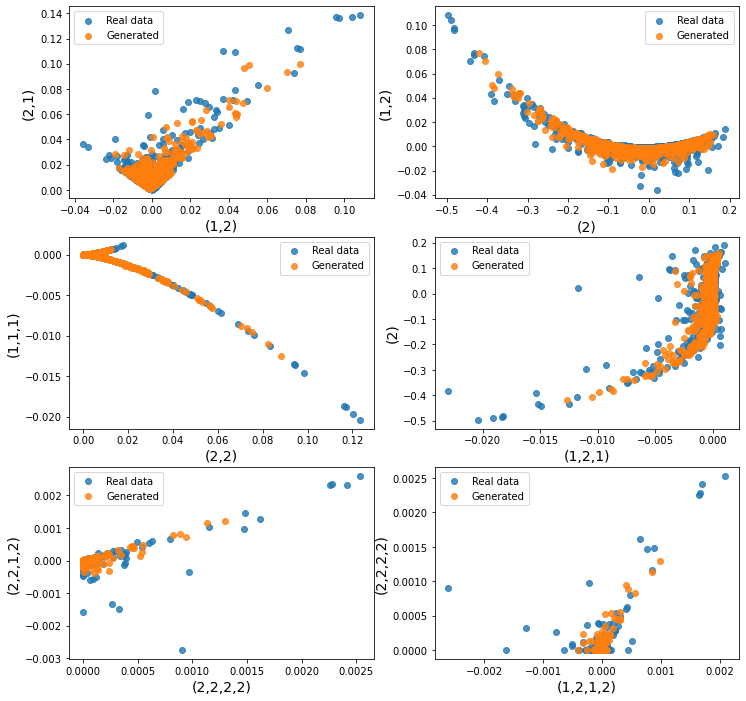

In [19]:
from esig.tosig import sigkeys

keys = sigkeys(2, order).split()

factor = []
for i in keys:
    factor.append((np.ceil((len(i)-2)/2)))
factor = np.array(factor)

PROJECTIONS = [(4, 5), (2, 4), (6, 7), (9, 2), (30,28), (20,30)]

plt.figure(figsize=(12, 12))
for i, projection in enumerate(PROJECTIONS):
    plt.subplot(3, 2, i + 1)

    plt.scatter(orig_sig[:, projection[0]], orig_sig[:, projection[1]],
                label="Real data", alpha = 0.8)
    plt.scatter(generated_sigs[:, projection[0]], generated_sigs[:, projection[1]],
               label="Generated", alpha = 0.8)
    plt.xlabel(keys[projection[0]], fontsize=14)
    plt.ylabel(keys[projection[1]], fontsize=14)
#     plt.xticks([])
#     plt.yticks([])
    plt.legend()
    
plt.show()

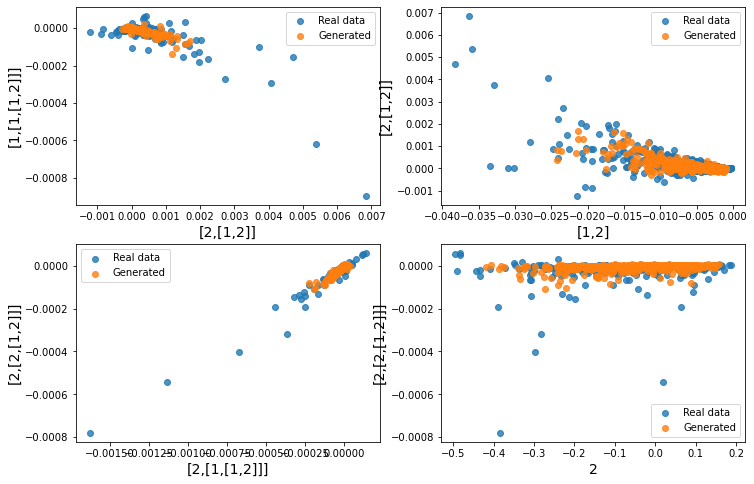

In [20]:
from esig.tosig import logsigkeys
import re

logkeys = logsigkeys(2, order).split()

logfactor = []
for i in logkeys:
    logfactor.append((len(re.sub("\D", "", i))))
logfactor = np.array(logfactor)

PROJECTIONS = [(4, 5), (2, 4), (6, 7), (1, 7)]

plt.figure(figsize=(12, 8))
for i, projection in enumerate(PROJECTIONS):
    plt.subplot(2, 2, i+1)

    plt.scatter(orig_logsig[:, projection[0]], orig_logsig[:, projection[1]],
                label="Real data", alpha=0.8)
    plt.scatter(generated[:, projection[0]], generated[:, projection[1]],
               label="Generated", alpha=0.8)
    plt.xlabel(logkeys[projection[0]], fontsize=14)
    plt.ylabel(logkeys[projection[1]], fontsize=14)
#     plt.xticks([])
#     plt.yticks([])
    plt.legend()
    
plt.show()

## Validation: two-sample statistical test

In [40]:
import evaluation
reload(evaluation)
test_sig = np.array([_sig(path) for path in tqdm(_load_rough_bergomi(params), desc="Computing signatures")])

In [28]:
res = evaluation.test(generated_sigs, test_sig[1:], order=order, compute_sigs=False,
                                 confidence_level=0.994)
print("Are the generated and real distributions DIFFERENT? {}".format(res))


c: 0.009817613903172201
TU: 0.009199785325697984
Are the generated and real distributions DIFFERENT? False


In [41]:
import process_discriminator
reload(process_discriminator)
res = process_discriminator.test(generated_sigs, test_sig[1:], order=order, compute_sigs=False,
                                 confidence_level=0.999999)

print("Are the generated and real distributions DIFFERENT? {}".format(res))


c: 0.0001265544310741031
TU: 0.0002500448999080973
Are the generated and real distributions DIFFERENT? True
